In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np

begin, end = 2, 30 # (begin is inclusive, end is exclusive)
time = np.arange(begin, end, 1)

# Class to cleanly save samples
class Sample:
    def __init__(self):
        self.data = {
            'RawEEG': [],
            'Alpha': [],
            'Low Beta': [],
            'High Beta': [],
            'Gamma': [],
            'Theta': [],
            'Delta': [],
            'Meditation': [],
            'Attention': []
        }

    def recordDataPoint(self, RawEEG, Attention, Meditation, Alpha, Delta, Theta, LowBeta, HighBeta, Gamma):
        self.data['RawEEG'].append(float(RawEEG))
        self.data['Attention'].append(float(Attention))
        self.data['Meditation'].append(float(Meditation))
        self.data['Alpha'].append(float(Alpha))
        self.data['Delta'].append(float(Delta))
        self.data['Theta'].append(float(Theta))
        self.data['Low Beta'].append(float(LowBeta))
        self.data['High Beta'].append(float(HighBeta))
        self.data['Gamma'].append(float(Gamma))

    '''
    Record a line of data from the CSV output, which takes form RawEEG, Alpha, Delta, Gamma, Low Beta, High Beta, Theta, Attention, Meditation

    '''
    def recordDataLine(self, line):
        self.recordDataPoint(line[0], line[7], line[8], line[1], line[2], line[6], line[4], line[5], line[3])
    
    def getEEG(self):
        return self.data['RawEEG']
    
    def getAttention(self):
        return self.data["Attention"]
    
    def getMeditation(self):
        return self.data["Meditation"]
    
    def getAlpha(self):
        return self.data["Alpha"]
    
    def getDelta(self):
        return self.data["Delta"]
    
    def getTheta(self):
        return self.data["Theta"]
    
    def getLowBeta(self):
        return self.data["Low Beta"]
    
    def getHighBeta(self):
        return self.data["High Beta"]
    
    def getGamma(self):
        return self.data["Gamma"]

    def get(self, key):
        return self.data[key]

    '''
    Scales the data by standard deviation of the EEG data
    '''
    def scale(self):
        eeg_std_dev = np.std(self.data['RawEEG'])
        self.data['Alpha'] = [x / eeg_std_dev for x in self.data['Alpha']]
        self.data['Delta'] = [x / eeg_std_dev for x in self.data['Delta']]
        self.data['Theta'] = [x / eeg_std_dev for x in self.data['Theta']]
        self.data['Low Beta'] = [x / eeg_std_dev for x in self.data['Low Beta']]
        self.data['High Beta'] = [x / eeg_std_dev for x in self.data['High Beta']]
        self.data['Gamma'] = [x / eeg_std_dev for x in self.data['Gamma']]

In [10]:
data = []
dataLabels = []

folder = "raw_data"

def transcribeFileToSample(sampleNum: int, brainState: str):

    sampleData = Sample()
    
    with open(folder + "/" + brainState + str(sampleNum) + ".csv") as csvFile:
        reader = csv.reader(csvFile)
        header = next(reader)

        readingFirstLine = begin
        linesRead = 0

        for row in reader:
            if readingFirstLine > 0:
                readingFirstLine -= 1
                continue
            
            sampleData.recordDataPoint(row[0], row[7], row[8], row[1], row[2], row[6], row[4], row[5], row[3])

            linesRead += 1
            if(linesRead >= end - begin):
                break
    
    data.append(sampleData)
    dataLabels.append(brainState)

# Transcribe active
for i in range(1,17):
    transcribeFileToSample(i, "active")
    
# Transcribe meditate
for i in range(1,16):
    transcribeFileToSample(i, "meditate")

# Transcribe neutral
for i in range(1,16):
    transcribeFileToSample(i, "neutral")

In [11]:
cv_begin = 2
cv_end = 30

cv_data = []
cv_dataLabels = []

cv_samples = {
    "active": 5,
    "neutral": 5,
    "meditate": 5
}

def cv_transcribeFileToSample(sampleN: int, state: str):
    sample_data = Sample()

    with open("raw_cv_data/" + state + str(sampleN) + ".csv") as f:
        reader = csv.reader(f)

        header = next(reader)
        
        for row in reader:
            sample_data.recordDataLine(row)

        for key in sample_data.data:
            sample_data.data[key] = sample_data.data[key][cv_begin:cv_end]

        cv_data.append(sample_data)
        cv_dataLabels.append(state)

for state in cv_samples:
    for i in range(cv_samples[state]):
        cv_transcribeFileToSample(i + 1, state)

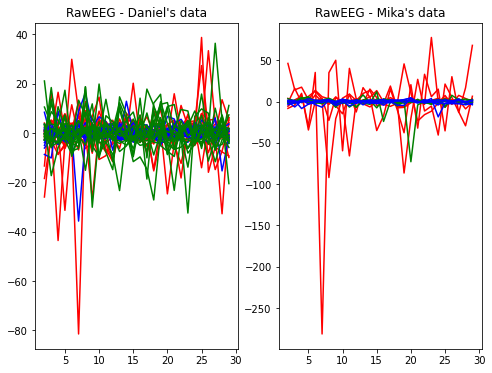

<Figure size 432x288 with 0 Axes>

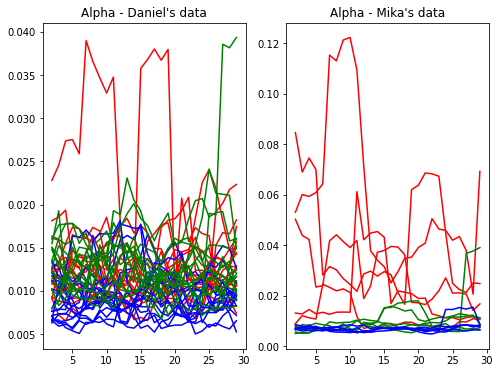

<Figure size 432x288 with 0 Axes>

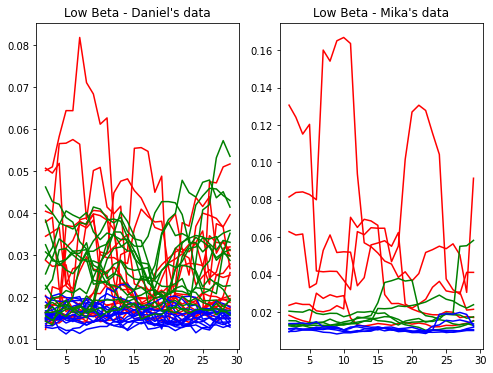

<Figure size 432x288 with 0 Axes>

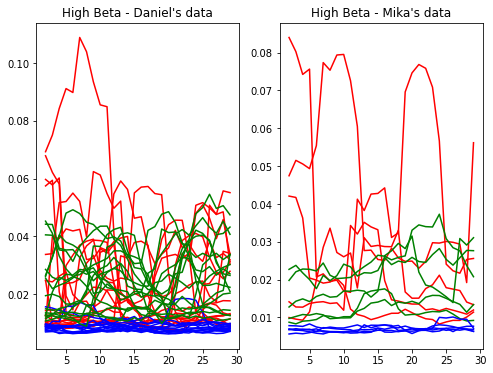

<Figure size 432x288 with 0 Axes>

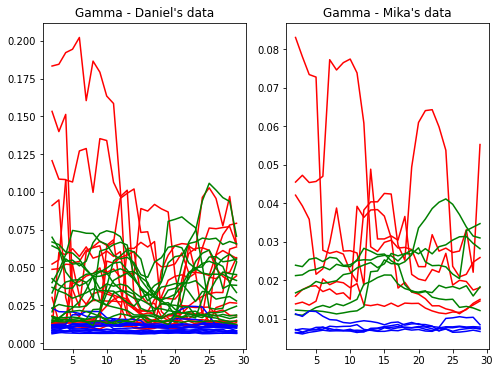

<Figure size 432x288 with 0 Axes>

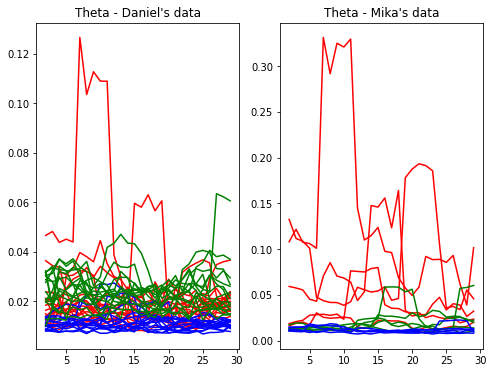

<Figure size 432x288 with 0 Axes>

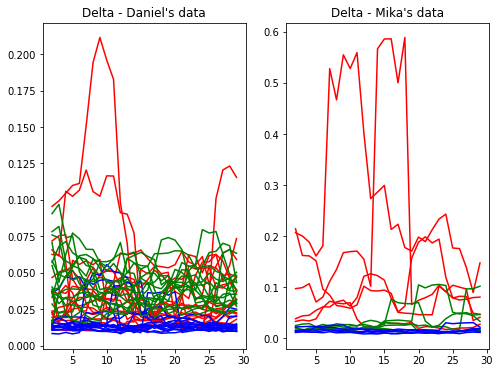

<Figure size 432x288 with 0 Axes>

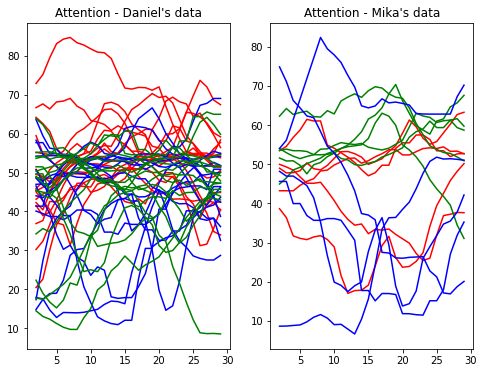

<Figure size 432x288 with 0 Axes>

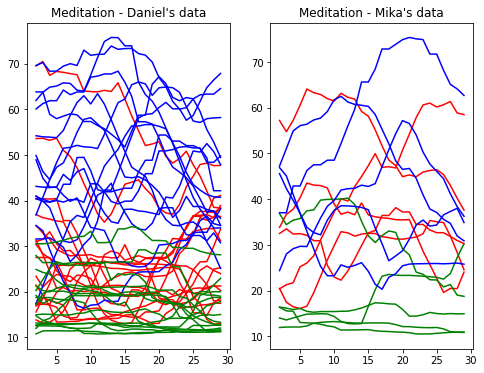

<Figure size 432x288 with 0 Axes>

In [12]:
x = np.arange(begin, end, 1)

def plot_feature(feature: str):

    plt.figure(figsize = (8,6))

    plt.subplot(121)
    plt.title(feature + " - Daniel's data")
    for sample, label in zip(data, dataLabels):
        if label == "active":
            plt.plot(x, sample.get(feature), 'r')
        elif label == "neutral":
            plt.plot(x, sample.get(feature), 'g')
        elif label == "meditate":
            plt.plot(x, sample.get(feature), 'b')
    
    plt.subplot(122)
    plt.title(feature + " - Mika's data")

    for sample, label in zip(cv_data, cv_dataLabels):
        if label == "active":
            plt.plot(x, sample.get(feature), 'r')
        elif label == "neutral":
            plt.plot(x, sample.get(feature), 'g')
        elif label == "meditate":
            plt.plot(x, sample.get(feature), 'b')

    plt.show()
    plt.clf()

plot_feature("RawEEG")
plot_feature("Alpha")
plot_feature("Low Beta")
plot_feature("High Beta")
plot_feature("Gamma")
plot_feature("Theta")
plot_feature("Delta")
plot_feature("Attention")
plot_feature("Meditation")
